In [1]:
%matplotlib inline
from pprint import pprint
import itertools

from market import Returns_US_1871
from simulate import simulate_withdrawals
from harvesting import N_60_RebalanceHarvesting
from metrics import average

/home/justus/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['League Spartan'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


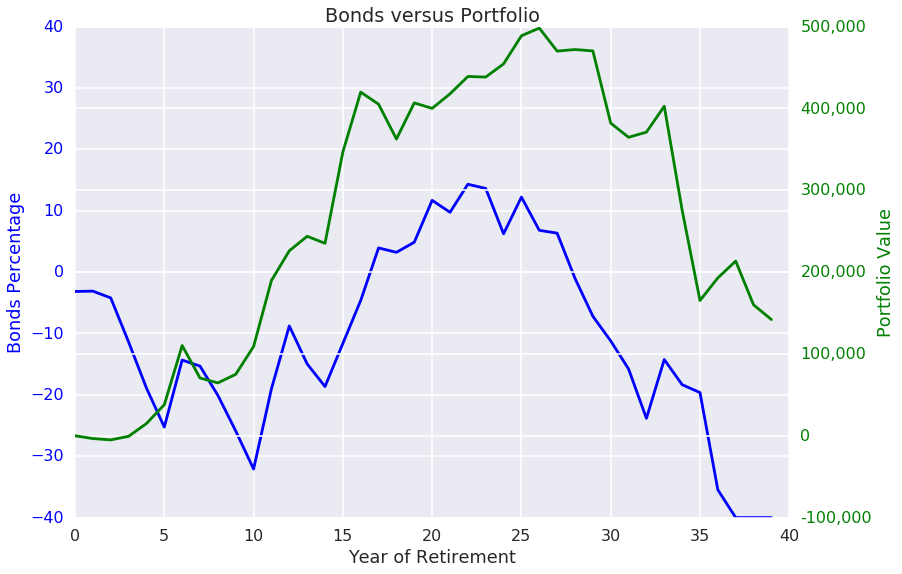

In [2]:
from plot import plt, format_axis_labels_with_commas

def sim2(series):
    years = 40
    (r1, r2) = itertools.tee(series)
    x = simulate_withdrawals(r1, years=years)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting)
    
    def bond_pct(p):
        return p.portfolio_bonds / p.portfolio_n * 100

    bonds_diff = list(map(lambda a,b: bond_pct(a) - bond_pct(b), x, y))
    port_diff = list(map(lambda a,b: a.portfolio_r - b.portfolio_r, x, y))
    return (bonds_diff, port_diff)

def sim(series):
    years = 30
    (r1, r2) = itertools.tee(series)
    x = simulate_withdrawals(r1, years=years)
    y = simulate_withdrawals(r2, years=years, harvesting=N_60_RebalanceHarvesting)

    bonds_prime = [n.portfolio_bonds / n.portfolio_n * 100 for n in x]
    portfolio_prime = [n.portfolio_r for n in x]

    bonds_rebalance = [n.portfolio_bonds / n.portfolio_n * 100 for n in y]
    portfolio_rebalance = [n.portfolio_r for n in y]
    return ([(bonds_prime, portfolio_prime),
            (bonds_rebalance, portfolio_rebalance)])


def p(bonds, portfolio):
    fig, ax1 = plt.subplots()
    ax1.plot(bonds, 'b')
    ax1.set_ylabel('Bonds Percentage', color='b')
    ax1.set_xlabel('Year of Retirement')
    ax1.set_ylim([-40,40])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(portfolio, 'g')
    ax2.set_ylabel('Portfolio Value', color='g')
#    ax2.set_ylim([0,2000000])
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    format_axis_labels_with_commas(ax2.get_yaxis())

    plt.xlabel('Year of Retirement')
    plt.title('Bonds versus Portfolio')
    plt.show()

year = 1940
r = Returns_US_1871()

y = sim2(r.iter_from(year))
p(*y)


#y = sim(r.iter_from(year))
#print(average(y[0][1]))
#print(average(y[1][1]))
#p(*y[0])
#p(*y[1])